[**Dr. Kevin M. Moerman**](mailto:kevin.moerman@nuigalway.ie), _Lecturer in Biomedical Engineering_   

National University of Ireland Galway.   

---

This content is derived from a Jupyter notebook. Jupyter notebooks are a great way to combine teaching of theory and numerical implementation side-by-side and in an interactive manor.

* To run the Jupyter notebooks and to interact with the code uses should set-up Jupyter. Note that doing so is not a requirement for this course. All contant can be understood and studied without using the live code functionality. Students wishing to "skip" the codes can do so and focus on the theoretical content instead. 
* One way to set-up Jupyter is to install the Conda Python environment (https://www.anaconda.com/distribution/), which comes with Jupyter. See also instructions here: https://jupyter.org/
* For Octave (MATLAB syntax) notebooks users need to install Octave: https://www.gnu.org/software/octave/
* For Julia notebooks users could install Julia (https://julialang.org/) or use JuliaBox to run to notebooks directly in a browser (https://www.juliabox.com/). 
* The source for this notebook is found here: GitHub source: [https://github.com/Kevin-Mattheus-Moerman/NUIG_BME_402_6101](https://github.com/Kevin-Mattheus-Moerman/NUIG_BME_402_6101)


In [2]:
# Loading required packages (may take some time)
# Re-execute with Ctrl-Enter to suppress command window output (may interfere with PDF export)
using Pkg;
Pkg.add("Plots");
using Plots;

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


# The Constant Strain Triangle
## Shape functions
If $q$ is the node number/index then the linear shape functions are defined as: 
$$L_q=\frac{A_q}{A}$$

They can be visualized as: 
![CST_shape_functions.png](CST_shape_functions.png)


### Shape function computation
$$L_q=\frac{A_q}{A}$$
Deriving the shape functions for the CST requires calculation of the ratios of the areas $A_q$ and the total area $A=A_1+A_2+A_3$. 
![CST_shape_functions_2.png](CST_shape_functions_2.png)

With $p=\begin{bmatrix} x \\ y \end{bmatrix}$, $p_1=\begin{bmatrix} x_1 \\ y_1 \end{bmatrix}$, $p_2=\begin{bmatrix} x_2 \\ y_2 \end{bmatrix}$, and $p_3=\begin{bmatrix} x_3 \\ y_3 \end{bmatrix}$

$$A=\frac{1}{2}\bigg(\big((x_1-x_2)(y_1-y_3)\big)-\big((x_1-x_3)(y_1-y_2)\big)\bigg)$$
$$A_q=\frac{1}{2}(a_q+b_qx+c_qy)$$


$$L_1=\frac{1}{2A}(a_1+b_1x+c_1y)$$
$$a_1=x_2y_3-x_3y_2$$
$$b_1=y_2-y_3$$
$$c_1=x_3-x_2$$

$$L_2=\frac{1}{2A}(a_2+b_2x+c_2y)$$
$$a_2=x_3y_1-x_1y_3$$
$$b_2=y_3-y_1$$
$$c_2=x_1-x_3$$

$$L_3=\frac{1}{2A}(a_3+b_3x+c_3y)$$
$$a_3=x_1y_2-x_2y_1$$
$$b_3=y_1-y_2$$
$$c_3=x_2-x_1$$



In [1]:
# Define nodes
p1=[0 0]; #Node 1
p2=[2 0]; #Node 2
p3=[0 2]; #Node 3

#Define interpolation point
p=[0.5 1];

#Total area
A=0.5*(((p1[1]-p2[1])*(p1[2]-p3[2]))-((p1[1]-p3[1])*(p1[2]-p2[2])))

#Shape function 1
a1=p2[1]p3[2]-p3[1]p2[2]; b1=p2[2]-p3[2]; c1=p3[1]-p2[1]; #a,b,c
L_1=1/(2*A)*(a1+b1*p[1]+c1*p[2]); println(L_1)

#Shape function 2
a2=p3[1]p1[2]-p1[1]p3[2]; b2=p3[2]-p1[2]; c2=p1[1]-p3[1]; #a,b,c
L_2=1/(2*A)*(a2+b2*p[1]+c2*p[2]); println(L_2)

#Shape function 3
a3=p1[1]p2[2]-p2[1]p1[2]; b3=p1[2]-p2[2]; c3=p2[1]-p1[1]; #a,b,c
L_3=1/(2*A)*(a3+b3*p[1]+c3*p[2]); println(L_3) 

println(L_1+L_2+L_3) #Sum of shape function coordinates should be 1

# Visualize triangle
V=[p1;p2;p3;p1]; #Node set for plotting
Vp=[p1;p;p2;p;p3]; #Point set for plotting
plot(V[:,1],V[:,2],linewidth=2,xlabel="x",ylabel="y",color="blue",markersize=6,label="Triangle",aspect_ratio=1) #Plot graph
plot!(Vp[:,1],Vp[:,2],linewidth=2,xlabel="x",ylabel="y",color="green",markersize=6,label="Inner triangles") #Plot graph
scatter!(V[:,1],V[:,2],markersize=6, c=:red,label="Nodes") #Plot graph
scatter!(p[:,1],p[:,2],markersize=10, c=:green,label="p") #Plot graph

0.25
0.25
0.5
1.0


UndefVarError: UndefVarError: plot not defined

### Shape functions for interpolation
#### Displacement interpolation

$$u(x,y)=\begin{bmatrix} N(x,y) \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}$$

$$\begin{bmatrix} u_x(x,y) \\ u_y(x,y) \end{bmatrix}=\begin{bmatrix} L_1 & 0 & L_2 & 0 & L_3 & 0 \\ 0 & L_1 & 0 & L_2 & 0 & L_3 \end{bmatrix}\begin{Bmatrix} u_{1x} \\ u_{1y} \\ u_{2x} \\ u_{2y} \\  u_{3x} \\ u_{3y} \end{Bmatrix}$$


In [152]:
u1=[0 0]; u2=[1 0]; u3=[0 1]; # Define displacements
um=[u1';u2';u3']; #Create displacement column array
N=[L_1 0 L_2 0 L_3 0; 0 L_1 0 L_2 0 L_3]; # The shape function matrix
up=N*um; #Calculate displacement at point p
println(up)

[0.25; 0.5]


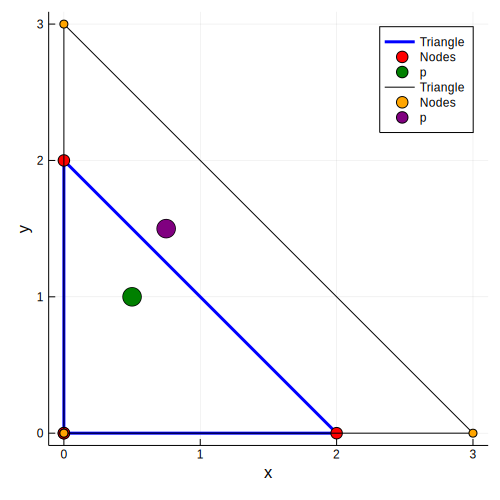

In [153]:
# Visualize triangle
pp=p+up'; #New coordinate for point p
V2=[p1+u1;p2+u2;p3+u3;p1+u1]; #Node set for plotting
plot(V[:,1],V[:,2],linewidth=3,xlabel="x",ylabel="y",color="blue",markersize=6,label="Triangle",aspect_ratio=1) #Plot graph
scatter!(V[:,1],V[:,2],markersize=6, c=:red,label="Nodes") #Plot graph
scatter!(p[:,1],p[:,2],markersize=10, c=:green,label="p") #Plot graph
plot!(V2[:,1],V2[:,2],linewidth=1,xlabel="x",ylabel="y",color="black",markersize=6,label="Triangle",aspect_ratio=1) #Plot graph
scatter!(V2[:,1],V2[:,2],markersize=4, c=:orange,label="Nodes") #Plot graph
scatter!(pp[:,1],pp[:,2],markersize=10, c=:purple,label="p") #Plot graph

### Shape functions for strain computation

$$\begin{Bmatrix} \varepsilon \end{Bmatrix}=\begin{bmatrix} B \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}$$

$$\begin{Bmatrix} \varepsilon_{xx} \\ \varepsilon_{yy} \\ \gamma_{xy}\end{Bmatrix}=\frac{1}{2A}\begin{bmatrix} b_1 & 0 & b_2 & 0 & b_3 & 0 \\ 0 & c_1 & 0 & c_2 & 0 & c_3 \\ c_1 & b_1 & c_2 & b_2 & c_3 & b_3 \end{bmatrix}\begin{Bmatrix} u_{1x} \\ u_{1y} \\ u_{2x} \\ u_{2y} \\  u_{3x} \\ u_{3y} \end{Bmatrix}$$



In [154]:
B=(1/(2*A))*[b1 0 b2 0 b3 0; 0 c1 0 c2 0 c3; c1 b1 c2 b2 c3 b3]
E=B*um

3×1 Array{Float64,2}:
 0.5
 0.5
 0.0